In [43]:
import heartpy as hp
import numpy as np
import pandas as pd

In [44]:
# Testing code
data, timer = hp.load_exampledata(0)
fs = 100.0 #example file 0 is sampled at 100.0 Hz

working_data, measures = hp.process(data, fs, report_time=True)

print(measures['bpm']) #returns BPM value
print(measures['rmssd']) # returns RMSSD HRV measure


Finished in 0.011412 sec
58.898847631242
64.73723110319973


In [45]:
data = hp.get_data('Data/Raw Data/Multiple Cath/X001.txt', delim = ' ', column_name = 'AO')
data = data[0:1500]

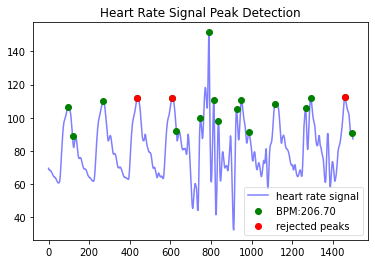

In [46]:
working_data, measures = hp.process(data, 240.0)
hp.plotter(working_data, measures, show = True, title = 'Heart Rate Signal Peak Detection')

In [47]:
# Reference code

# Peak Enhancement
# enhanced = hp.enhance_peaks(data, iterations=2)

# Butterworth filter
filtered1 = hp.filter_signal(data, cutoff=5, sample_rate=240.0, order=3, filtertype='lowpass')
f1_1, f1_2 = hp.process(filtered1, 240.0)

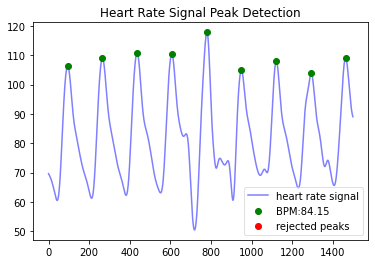

In [48]:
hp.plotter(f1_1, f1_2, show = True, title = 'Heart Rate Signal Peak Detection')

In [61]:
filtered2 = hp.filter_signal(data, cutoff=5, sample_rate=240.0, order=3, filtertype='highpass')
f2_1, f2_2 = hp.process(filtered2, 240.0)
hp.plotter(f2_1, f2_2, show = True, title = 'Heart Rate Signal Peak Detection')

BadSignalWarning: 
----------------
Could not determine best fit for given signal. Please check the source signal.
 Probable causes:
- detected heart rate falls outside of bpmmin<->bpmmax constraints
- no detectable heart rate present in signal
- very noisy signal (consider filtering and scaling)
If you're sure the signal contains heartrate data, consider filtering and/or scaling first.
----------------


In [60]:
filtered2

array([ 0.44202927,  0.11406969, -0.2135768 , ...,  1.58784369,
        1.45773606,  0.93135499])

In [56]:
filtered1

array([69.61613106, 69.48958946, 69.35826266, ..., 89.50276994,
       89.24659555, 89.0297373 ])